In [191]:
 
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [192]:
dfr=pd.read_csv('winequality_red.csv',header=0)

In [193]:
dfw=pd.read_csv('winequality_white.csv',header=0)

In [194]:
dfr['color']= 'R'

In [195]:
dfw['color']='W'

In [196]:
df_all=pd.concat([dfr,dfw],axis=0)

In [197]:
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [198]:
dfw.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':
                    'citric_acid','volatile acidity':'volatile_acidity','residual sugar':
                    'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':
                    'total_sulfur_dioxide'}, inplace=True)

In [199]:
dfr.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':
                      'citric_acid','volatile acidity':'volatile_acidity','residual sugar':
                      'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':
                      'total_sulfur_dioxide'}, inplace=True)

In [200]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':
                       'citric_acid','volatile acidity':'volatile_acidity','residual sugar':
                       'residual_sugar','free sulfur dioxide':
                       'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [201]:
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [202]:
df = pd.get_dummies(df_all, columns=["color"])

In [203]:
# Acess data quality and missing values


In [204]:
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [205]:
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Nothing looks particularly out of place (e.g. no negative values in pH). 
Interestingly, no wines scored below a 3 or above a 9 (no perfect 10/10 scores)

In [206]:
# red vs white wine

print("white mean = ",dfw["quality"].mean())
print("red mean =",dfr["quality"].mean())


white mean =  5.87790935075541
red mean = 5.6360225140712945


In [207]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


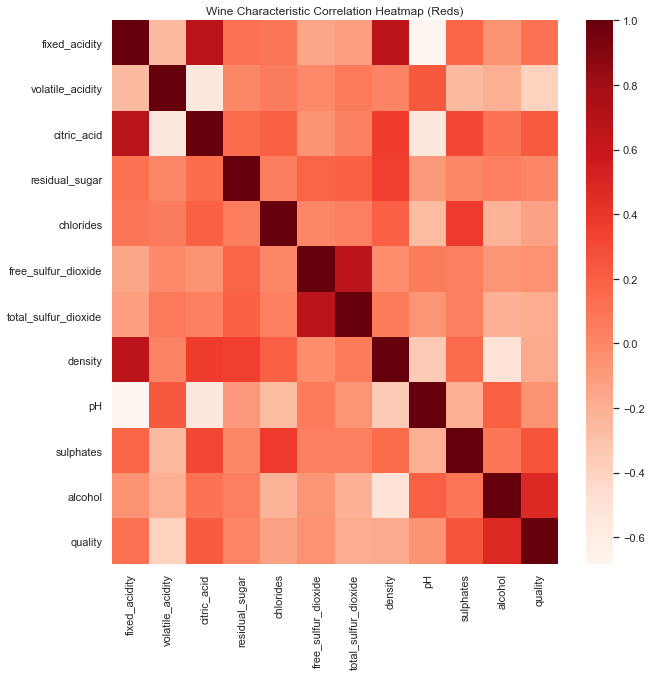

In [208]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = dfr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

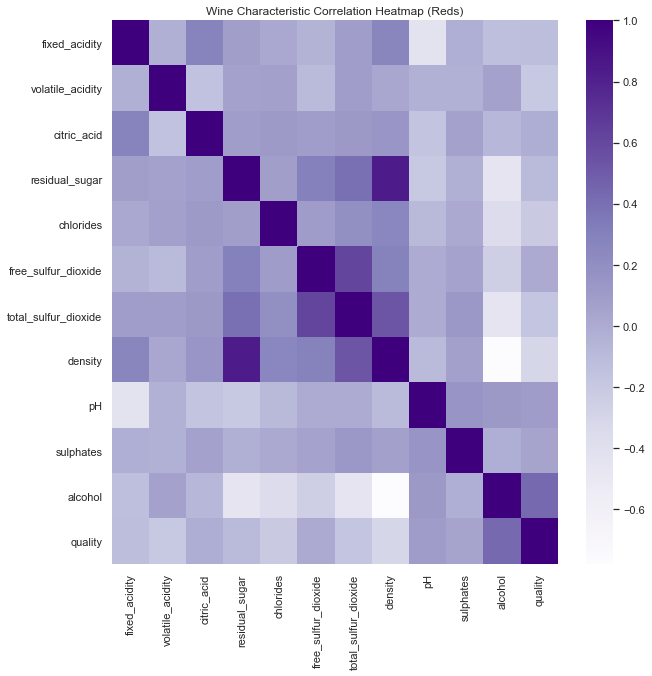

In [209]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = dfw.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")


In [210]:
df_r_corr=dfr.corr()
df_w_corr=dfw.corr()

In [211]:
df_r_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [212]:
df_w_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [213]:
diff_corr = df_r_corr - df_w_corr

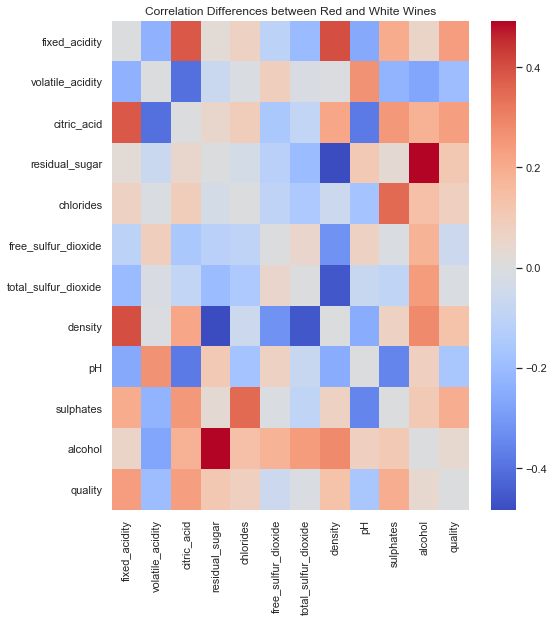

In [214]:
plt.subplots(figsize=(8,9))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

Predicting Quality: Linear Regression

In [215]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=4) 
## add a starting random point (4) so results can be reproduced 

In [216]:
results1 = smf.ols('quality ~ total_sulfur_dioxide + free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density + color_R', data=df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:34:47   Log-Likelihood:                -7198.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6486   BIC:                         1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.7597 

Note the warning:
"[2] The condition number is large, 2.93e+05. This might indicate that there is strong multicollinearity or other numerical problems."
We'll see how our out-of-sample test results perform (if there's a lot of multicollinearity present, we'd expect to see decreased performance)

In [217]:
y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]

X=train[cols]

In [218]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
ytrain_pred = regr.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.54


In [220]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]

Xtest=test[cols]

In [221]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))


Out-of-sample Mean squared error: 0.54


The out-of-sample MSE isn't too much higher than the train sample, which is a good indication that there isn't too much overfitting in our model.

In [222]:
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(df, test_size=0.4, random_state=4)

In [223]:
y2 = train2["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]
X2=train2[cols]
regr.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
ytrain_pred2 = regr.predict(X2)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y2, ytrain_pred2))

In-sample Mean squared error: 0.53


In [225]:
ytest2 = test2["quality"]
Xtest2=test2[cols]

In [226]:
ypred2 = regr.predict(Xtest2)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest2, ypred2))

Out-of-sample Mean squared error: 0.55


Again, the out-of-sample MSE isn't too much higher than the train sample, which indicates the model isn't overfit on the training data.

However, based on our assessment of the correlation heatmap, we can see that there is strong evidence for multicollinearity (total sulur dioxide and free sulfur dioxide are inherently related. 
                                                                                                                             The same appears to be true with density, citric acid, and fixed acidity).

What's more, the adjusted R-squared for this model very low, 
and indicates that only 29.5% of the variation in a wine's quality is due to variation in these variables.

One way we can address this is by building separate regressions for Red and White wine (an easy way to segment the data).
From our heatmaps, we already know that there are certain variables that behave differently given the type of wine. 
Before we move onto more advanced modeling techniques, let's just try this approach of splitting the data along color.

In [227]:
# White Wine Model
w_train, w_test = train_test_split(dfw, test_size=0.2)

In [228]:
results_w = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', 
                    data=dfw).fit()
print(results_w.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:34:48   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062    

In [229]:
y_w = w_train["quality"]
cols_w = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_w=w_train[cols_w]
regr.fit(X_w,y_w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
ytrain_predw = regr.predict(X_w)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_w, ytrain_predw))

In-sample Mean squared error: 0.57


In [231]:
ytestw = w_test["quality"]
Xtestw = w_test[cols_w]
ypredw = regr.predict(Xtestw)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestw, ypredw))

Out-of-sample Mean squared error: 0.56


In [232]:
#Red Wine Model

In [233]:
r_train, r_test = train_test_split(dfr, test_size=0.2)

In [234]:
results_r = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density',
                    data=dfw).fit()
print(results_r.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:34:49   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062    

In [235]:
y_r = r_train["quality"]
cols_r = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_r=r_train[cols_r]
regr.fit(X_r,y_r)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
ytrain_predr = regr.predict(X_r)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_r, ytrain_predr))

In-sample Mean squared error: 0.42


In [237]:
ytestr = r_test["quality"]
Xtestr = r_test[cols_r]
ypredr = regr.predict(Xtestr)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestr, ypredr))

Out-of-sample Mean squared error: 0.46


In [238]:
#combine results for testing
y_both = pd.concat([y_w,y_r])

In [239]:
ytrain_predW=pd.DataFrame(ytrain_predw)
ytrain_predR=pd.DataFrame(ytrain_predr)

y_train_predboth = pd.concat([ytrain_predW,ytrain_predR])

In [240]:
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_both, y_train_predboth))

In-sample Mean squared error: 0.53


In [241]:
ytestboth = pd.concat([ytestw,ytestr])
Xtestboth = pd.concat([Xtestw,Xtestr])
                                          
ypredboth = pd.concat([pd.DataFrame(ypredw),pd.DataFrame(ypredr)])
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestboth, ypredboth))

Out-of-sample Mean squared error: 0.53


In [242]:
from sklearn import svm

y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","color_R"]
X=train[cols]

clf = svm.SVR(C=1.0, epsilon=0.2)
clf.fit(X, y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [243]:
ytrain_pred = clf.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.61


In [244]:
ytest = test["quality"]
Xtest=test[cols]

In [245]:
ypred = clf.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.62


In [246]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=77)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.00219999  0.00594954  0.02404064  0.00250382 -1.54910878  0.33993221
  0.48330045  0.08175248  0.08206276]


In [248]:
pred = lm.predict( Xtest)

Text(0, 0.5, 'Predicted Y')

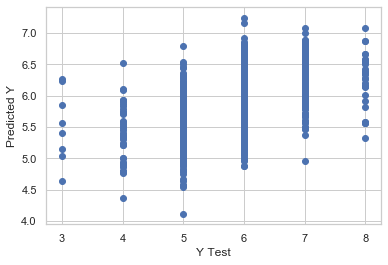

In [249]:
plt.scatter(ytest,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [250]:
lm.score(Xtrain,ytrain)

0.29197857354774137

In [251]:
#predict the value
pred=lm.predict(Xtest)
print("predicted result :",pred)
print("actual ",ytest)

predicted result : [6.19596346 6.11940569 5.97087796 ... 5.80999381 5.57650585 6.08506639]
actual  4714    7
1716    6
3926    6
3776    5
4155    5
       ..
1037    5
2782    6
4227    7
777     5
1699    6
Name: quality, Length: 1040, dtype: int64


In [252]:
#r2 score  ->  coefficient of determination
#is the proportion of the variancein the dependent variable that is predictable from the independent variables
# i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(ytest,pred))

0.29105981808185977


In [253]:
# x_train,x_test,y_train,y_test

In [254]:
from sklearn.linear_model import Lasso,Ridge

In [255]:
#will reduce the cofficient to zero(these features are not informative)


#default value of alpha = 1.0
#aplha=.01
ls=Lasso(alpha=.01)
ls.fit(Xtrain,ytrain)
ls.score(Xtrain,ytrain)

0.27742038764812105

In [256]:
ls.coef_

array([-0.00241775,  0.00701587,  0.02076201,  0.00730484, -0.93811413,
        0.33230526,  0.        ,  0.        ,  0.        ])

In [257]:
#try to minimise the cofficent variance

rd=Ridge(alpha=0.01)

rd.fit(Xtrain,ytrain)
rd.score(Xtrain,ytrain)

0.29197857219398793

In [258]:
rd.coef_

array([-0.00220017,  0.00595004,  0.0240401 ,  0.00250931, -1.54884996,
        0.33993107,  0.48326939,  0.08174568,  0.08198538])

In [259]:
#ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(Xtrain,ytrain)
enrpred=enr.predict(Xtest)
print(enr.score(Xtrain,ytrain))
enr.coef_


0.014088192151709977


array([-0.00166475,  0.00459497, -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ])

In [260]:
from sklearn.svm import SVR
svr=SVR(kernel = "linear")
svr.fit(Xtrain,ytrain)
svr.score(Xtrain,ytrain)
pred_y=svr.predict(Xtest)
print(svr.score(Xtrain,ytrain))


svr=SVR(kernel = "poly")
svr.fit(Xtrain,ytrain)
svr.score(Xtrain,ytrain)
pred_y=svr.predict(Xtest)
print(svr.score(Xtrain,ytrain))


svr=SVR(kernel = "rbf")
svr.fit(Xtrain,ytrain)
svr.score(Xtrain,ytrain)
pred_y=svr.predict(Xtest)
print(svr.score(Xtrain,ytrain))


0.2887077621821219
0.10774059422076754
0.15093717033468512


In [261]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(Xtrain,ytrain)
    print(sv.score(Xtrain,ytrain))

0.2887077621821219
0.10774059422076754
0.15093717033468512


In [262]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=r_state,test_size=0.30)
    regr=linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred=regr.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corrosponding to random state ",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()
print()
print("max r2 score corrosponding to",final_r_state,"is",max_r_score)

r2_score corrosponding to random state  42 is 0.26743670500207095
r2_score corrosponding to random state  43 is 0.2777195512900903
r2_score corrosponding to random state  44 is 0.2987517525882061
r2_score corrosponding to random state  45 is 0.28246581481000443
r2_score corrosponding to random state  46 is 0.2809505882226634
r2_score corrosponding to random state  47 is 0.2579598137046448
r2_score corrosponding to random state  48 is 0.290698042130177
r2_score corrosponding to random state  49 is 0.2666011355110923
r2_score corrosponding to random state  50 is 0.30433270714780347
r2_score corrosponding to random state  51 is 0.303495864939902
r2_score corrosponding to random state  52 is 0.3004894601997067
r2_score corrosponding to random state  53 is 0.29776572636651355
r2_score corrosponding to random state  54 is 0.3035335606408397
r2_score corrosponding to random state  55 is 0.29423203393250974
r2_score corrosponding to random state  56 is 0.30597559769785776
r2_score corrospondin

In [263]:
#cross validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.2997732909760138
RMSE is:  0.7468239392382664


In [264]:
# Now saving the model using joblib
from sklearn.externals import joblib
# save the model using pickle in a file
joblib.dump(rd,'rd_wine.pkl')

['rd_wine.pkl']

In [266]:
#As a result we can say that none of the model is performing well